In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/merged_file.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1385864404881711104,Sat Apr 24 07:53:16 +0000 2021,62055,Depresi itu bukan sekadar merasa sedih dan mur...,1385864404881711104,https://pbs.twimg.com/media/EzuUVCXUcAAyUSO.jpg,NaN,in,Bogor,1987,724,20864,https://x.com/jiemiardian/status/1385864404881...,68714545,jiemiardian
1,1861332858377510916,Tue Nov 26 08:55:09 +0000 2024,5275,Lagi melakukan adegan dewasa: Ketika ada yang ...,1861332858377510916,https://pbs.twimg.com/media/GdTIXZcbsAA-vMA.jpg,NaN,in,NaN,70,16,1475,https://x.com/jaelussyahadat/status/1861332858...,78076491,jaelussyahadat
2,1861242009316663814,Tue Nov 26 02:54:09 +0000 2024,2339,Seringai baru merilis Pulang . tersedia di pla...,1861242009316663814,https://pbs.twimg.com/media/GdR1vAlbkAA1-t9.jpg,NaN,in,"jakarta, indonesia",95,119,1168,https://x.com/aparatmati/status/18612420093166...,40043449,aparatmati
3,1845616211008348178,Mon Oct 14 00:02:49 +0000 2024,5865,Tahajud adalah obat ajaib untuk depresi kecema...,1845616211008348178,NaN,NaN,in,NaN,13,125,1104,https://x.com/untitled246/status/1845616211008...,1427853294332911618,untitled246
4,1064451731772203008,Mon Nov 19 09:34:04 +0000 2018,5714,Pernah terpikirkan ngga untuk UNINSTALL INSTAG...,1064451731772203008,https://pbs.twimg.com/media/DsWxM3ZU8AAMAE5.jpg,NaN,in,"Bandung, Indonesia",466,338,4170,https://x.com/Madariyanhadi/status/10644517317...,69218314,Madariyanhadi


# PREPROCESSING

In [ ]:
import re
import string
from textblob import TextBlob

In [ ]:
df.shape

(3102, 15)

**CLEANING DATA**

In [ ]:
def clean_twitter_text(text):
  text = re.sub(r'@[A-Za-z0-9_]+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r' [^A-Za-z0-9\']', '', text)
  text = text.replace("&amp;", "&")
  emoji_pattern = re.compile(
      "["
      u"\U0001F600-\U0001F64F"  # Emoticons
      u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # Transport & map symbols
      u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
      u"\U00002500-\U00002BEF"  # Chinese characters
      u"\U00002702-\U000027B0"  # Dingbats
      u"\U000024C2-\U0001F251"  # Enclosed characters
      "]+",
      flags=re.UNICODE,
  )
  text = emoji_pattern.sub(r'', text)
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = re.sub(r'\s+', ' ', text).strip()

  return text

In [ ]:
df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [ ]:
df['full_text'] = df['full_text'].str.lower()

In [ ]:
df = df[['full_text']]
df.head()

,full_text
0,depresi itu bukan sekadar merasa sedih dan murung
1,lagi melakukan adegan dewasa ketika ada yang b...
2,seringai baru merilis pulang tersedia di platf...
3,tahajud adalah obat ajaib untuk depresi kecema...
4,pernah terpikirkan ngga untuk uninstall instag...


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(2886, 1)

**NORMALISASI**

In [ ]:
norm = {
    "ovt" : "overthinking",
    "strees" : "stres",
    "bundir": "bunuh diri",
    "tdk": "tidak",
    "yg" : "yang",
    "sekaranf": "sekarang",
    "sry" : "sorry",
    "aj":"aja",
    "skrng": "sekarang",
    "smpe":"sampai",
    "sampe" : "sampai" ,
    "bgt": "banget",
    "smg" : "semoga",
    "nggk" : "tidak",
    "ma ti" : "mati",
    "lg": "lagi",
    "cape" : "capek",
    "ak" : "aku",
    "elu" : "kamu",
    "w" : "gue",
    "pengen" : "ingin",
    "mau" : "ingin",
    "pingin" : "ingin",
    "nggak" : "tidak",
    "sekarang":"sekarang",
    "sampai" : "sampai",
    "pun10" : "permisi",
    "semoga":"semoga",
    "bngt" : "banget",
    "sesekali" : "sesekali",
    "kalo" : "kalau",
    "jd" : "jadi",
    "kl" : "kalau",
    "jan" : "jangan",
    "bet" : "banget",
    "jg" : "juga",
    "pol" : "banget",
    "Tpi" : "tapi",
    "tp" : "tapi",
    "i’m" : "i am",
    "it’s" : "it is",
    "don t" : "do not",
    "dont": "do not",
    "cant" : "can not",
    "can’t" : "can not",
    "sendiri" : "sendiri",
    "terserah" : "terserah",
    "nyerah" : "menyerah",
    "kek" : "kayak",
    "jgn" : "jangan",
    "beresin" : "beresin",
    "berantakan" : "berantakan",
    "nangis" : "nangis",
    "mengerti" : "mengerti",
    "menyerah": "menyerah",
    "pikiran" : "pikiran",
    "gak" : "tidak",
    "ga" : "tidak",
    "tujuan" : "tujuan",
    "seorang" : "seorang",
    "setuju" : "setuju",
    "hs" : "having sex",
    "ngga": "tidak",
    "rs" : "rumah sakit",
    "berhenti" : "berhenti"
}

def normalisasi(str_text):
    for key, value in norm.items():
        str_text = re.sub(rf'\b{re.escape(key)}\b', value, str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text
0,depresi itu bukan sekadar merasa sedih dan murung
1,lagi melakukan adegan dewasa ketika ada yang b...
2,seringai baru merilis pulang tersedia di platf...
3,tahajud adalah obat ajaib untuk depresi kecema...
4,pernah terpikirkan tidak untuk uninstall insta...
...,...
3097,sumpah asli orang kayak kamu tu cuma tau jilat...
3098,armor kata gue lu mending mati aja bgssttttt m...
3099,kangen banget sama akun ini setelah hampir men...
3100,kalau panik paniknya gue cuma bikin repot mend...


**SPELL CORRECTION**

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

def correct_spellings(text):
    spell = SpellChecker()
    corrected_text = []
    misspelled_words = spell.unknown(text.split())

    for word in text.split():
        if word in misspelled_words:
            # Get the correction or keep the original word if None
            correction = spell.correction(word)
            corrected_text.append(correction if correction is not None else word)
        else:
            corrected_text.append(word)

    return " ".join(corrected_text)

df['full_text'] = df['full_text'].apply(lambda x: correct_spellings(x))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 91.5 MB/s eta 0:00:00


KeyboardInterrupt: 

**STOPWORD**

In [ ]:
!pip install Sastrawi

In [ ]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["di", "yang", "dll", "fess", "yuai", "yujiem"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text
0,depresi bukan sekadar merasa sedih murung
1,melakukan adegan dewasa ada bikin sedih berduk...
2,seringai baru merilis pulang tersedia platform...
3,tahajud obat ajaib depresi kecemasan berbagai ...
4,pernah terpikirkan untuk uninstall instagram t...


In [ ]:
tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[depresi, bukan, sekadar, merasa, sedih, murung]"
1,"[melakukan, adegan, dewasa, ada, bikin, sedih,..."
2,"[seringai, baru, merilis, pulang, tersedia, pl..."
3,"[tahajud, obat, ajaib, depresi, kecemasan, ber..."
4,"[pernah, terpikirkan, untuk, uninstall, instag..."
...,...
3097,"[sumpah, asli, orang, kayak, kamu, cuma, tau, ..."
3098,"[armor, kata, gue, lu, mending, mati, aja, bgs..."
3099,"[kangen, banget, sama, akun, setelah, hampir, ..."
3100,"[kalau, panik, paniknya, gue, cuma, bikin, rep..."


**LEMMATIZATION**

In [ ]:
pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

tokenized = df['full_text'].apply(lambda x: x.split())

lemmatized_text = tokenized.apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

df['lemmatized_text'] = lemmatized_text

print(df[['full_text', 'lemmatized_text']].head())

                                           full_text  \
0          depresi bukan sekadar merasa sedih murung   
1  melakukan adegan dewasa ada bikin sedih berduk...   
2  seringai baru merilis pulang tersedia platform...   
3  tahajud obat ajaib depresi kecemasan berbagai ...   
4  pernah terpikirkan untuk uninstall instagram t...   

                                     lemmatized_text  
0            depresi bukan sekadar rasa sedih murung  
1  laku adegan dewasa ada bikin sedih duka pake r...  
2  seringai baru rilis pulang sedia platformplatf...  
3  tahajud obat ajaib depresi cemas bagai masalah...  
4  pernah pikir untuk uninstall instagram temen2 ...  


In [ ]:
df.head()

,full_text,lemmatized_text
0,depresi bukan sekadar merasa sedih murung,depresi bukan sekadar rasa sedih murung
1,melakukan adegan dewasa ada bikin sedih berduk...,laku adegan dewasa ada bikin sedih duka pake r...
2,seringai baru merilis pulang tersedia platform...,seringai baru rilis pulang sedia platformplatf...
3,tahajud obat ajaib depresi kecemasan berbagai ...,tahajud obat ajaib depresi cemas bagai masalah...
4,pernah terpikirkan untuk uninstall instagram t...,pernah pikir untuk uninstall instagram temen2 ...


In [ ]:
df.to_csv('hasil_lemmatization.csv', index=False, encoding='utf-8')

In [ ]:
df = df[['lemmatized_text']]

# LABELING

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/hasil_lemmatization (1).csv')
df

,full_text,lemmatized_text
0,depresi bukan sekadar merasa sedih murung,depresi bukan sekadar rasa sedih murung
1,melakukan adegan dewasa ada bikin sedih berduk...,laku adegan dewasa ada bikin sedih duka pake r...
2,seringai baru merilis pulang tersedia platform...,seringai baru rilis pulang sedia platformplatf...
3,tahajud obat ajaib depresi kecemasan berbagai ...,tahajud obat ajaib depresi cemas bagai masalah...
4,pernah terpikirkan untuk uninstall instagram t...,pernah pikir untuk uninstall instagram temen2 ...
...,...,...
2881,sumpah asli orang kayak kamu tu cuma tau jilat...,sumpah asli orang kayak kamu tu cuma tau jilat...
2882,armor kata gue lu mending mati aja bgssttttt m...,armor kata gue lu mending mati aja bgssttttt a...
2883,kangen banget sama akun setelah hampir meningg...,kangen banget sama akun telah hampir tinggal h...
2884,kalau panik paniknya gue cuma bikin repot mend...,kalau panik panik gue cuma bikin repot mending...


In [ ]:
df = df[['lemmatized_text']]
df

,lemmatized_text
0,depresi bukan sekadar rasa sedih murung
1,laku adegan dewasa ada bikin sedih duka pake r...
2,seringai baru rilis pulang sedia platformplatf...
3,tahajud obat ajaib depresi cemas bagai masalah...
4,pernah pikir untuk uninstall instagram temen2 ...
...,...
2881,sumpah asli orang kayak kamu tu cuma tau jilat...
2882,armor kata gue lu mending mati aja bgssttttt a...
2883,kangen banget sama akun telah hampir tinggal h...
2884,kalau panik panik gue cuma bikin repot mending...


In [ ]:
pip install transformers pandas

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="lxyuan/distilbert-base-multilingual-cased-sentiments-student")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")
model = AutoModelForSequenceClassification.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student")


In [ ]:
df["sentiment"] = df["lemmatized_text"].apply(lambda x: pipe(x)[0]['label'])

In [ ]:
df

,lemmatized_text,sentiment
0,depresi bukan sekadar rasa sedih murung,negative
1,laku adegan dewasa ada bikin sedih duka pake r...,negative
2,seringai baru rilis pulang sedia platformplatf...,positive
3,tahajud obat ajaib depresi cemas bagai masalah...,positive
4,pernah pikir untuk uninstall instagram temen2 ...,negative
...,...,...
2881,sumpah asli orang kayak kamu tu cuma tau jilat...,negative
2882,armor kata gue lu mending mati aja bgssttttt a...,negative
2883,kangen banget sama akun telah hampir tinggal h...,negative
2884,kalau panik panik gue cuma bikin repot mending...,negative


In [ ]:
df_netral = df[df["sentiment"] == "neutral"]
df_netral

,lemmatized_text,sentiment
107,kadang perlu alay hibur diri sendiri tidak dep...,neutral
327,bukan bunuh diri,neutral
440,ditawarin nonton gratis benar gw ambil tidak t...,neutral
729,mati tidak masuk neraka hidup tidak gimana solusi,neutral
1058,tetap tonton drama juga biasa nya kalau sampai...,neutral
1231,bukan bisa saja biasa butuh waktu biasa contoh...,neutral
1246,bukan bisa saja biasa bukan mampu saja butuh s...,neutral
1269,hukum tidak beli karenas u d a h d i b o r o n...,neutral
1281,tidak ini terlalu buat mata tidak kedip,neutral
1348,kayak bisa deh soal kamu bukan tipe makanya cuek,neutral


In [ ]:
df.to_csv('hasilabeling.csv', index=False, encoding='utf-8')

In [ ]:
import pandas as pd

df = df['sentiment'].value_counts()

In [ ]:
df

,count
sentiment,
negative,2407
positive,452
neutral,27


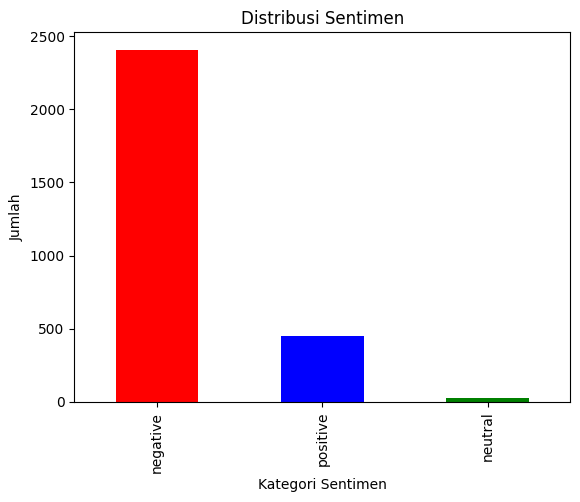

In [ ]:
import matplotlib.pyplot as plt

# Bar chart
df.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribusi Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.show()

<ipython-input-25-37bf23d4af77>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentiment_df, x='sentiment', palette='cool')


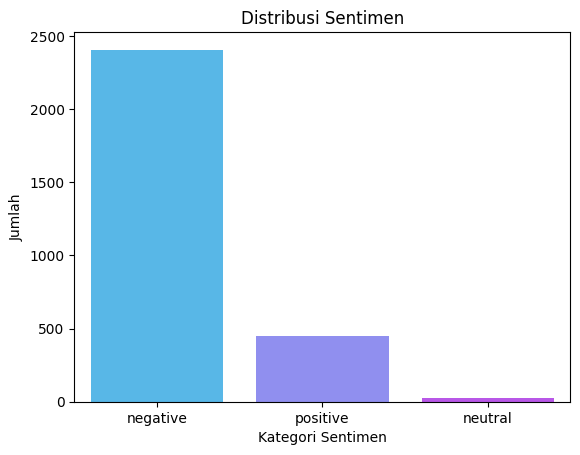

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sentiment_df = pd.read_csv('/content/hasilabeling.csv')
sns.countplot(data=sentiment_df, x='sentiment', palette='cool')
plt.title('Distribusi Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.show()

SPLIT DATASET

In [ ]:
#data training 70%
#data validasi 20%
#data test 10%

from sklearn.model_selection import train_test_split

dataset = pd.read_csv('/content/hasilabeling.csv')

# Split the dataset into training, validation, and test sets
train_set, val_set = train_test_split(dataset, test_size = 0.3, stratify = dataset['sentiment'], random_state = 1)
val_set, test_set = train_test_split(val_set, test_size = 0.33, stratify = val_set['sentiment'], random_state = 1)


print(f"Training set shape: {train_set.shape}")
print(f"Validation set shape: {val_set.shape}")
print(f"Testing set shape: {test_set.shape}")

#export to csv
train_set.to_csv('train_set.csv', sep='\t', header=None, index = False)
val_set.to_csv('val_set.csv', sep='\t', header=None, index = False)
test_set.to_csv('test_set.csv', sep='\t', header=None, index = False)

Training set shape: (2020, 2)
Validation set shape: (580, 2)
Testing set shape: (286, 2)


## **MODELLING**

# **indobert**


In [ ]:
!git clone https://github.com/ezaaputra/indonlu.git

!pip install emoji
!pip install transformers

import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from collections import defaultdict

#NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#model Indobert
import torch
import random
import torch.nn.functional as F
from torch import optim
from tqdm import tqdm

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig, AdamWeightDecay
from indonlu.utils.forward_fn import forward_sequence_classification
from indonlu.utils.metrics import document_sentiment_metrics_fn
from indonlu.utils.data_utils import DocumentSentimentDataset, DocumentSentimentDataLoader


fatal: destination path 'indonlu' already exists and is not an empty directory.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print ('there are %d GPU(s) available.' %torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
  print("No GPU available, using the CPU instead")
  device = torch.device("cpu")

there are 1 GPU(s) available.
We will use the GPU: Tesla T4


**TRAINING DATASET**

Fungsi set_seed buat nentuin seed/random number generator agar data/ acak sesuatu bisa di atur sehingga antara percobaan pertama dan seterusnya menggunakan data yang sama

In [ ]:
#common functions
def set_seed(seed):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)

def count_param(module, trainable=False):
  if trainable:
    return sum(p.numel() for p in module.parameters() if p.requires_grad)
  else:
    return sum(p.numel() for p in module.parameters())

def get_lr(optimizer):
  for param_group in optimizer.param_groups:
    return param_group['lr']

def metrics_to_string(metric_dict):
  string_list = []
  for key, value in metric_dict.items():
    string_list.append('{}:{:.2f}'.format(key, value))
  return ' '.join(string_list)

#Set random seed
set_seed(27)
print(set_seed)

<function set_seed at 0x7faf496f9fc0>


In [ ]:
df = pd.read_csv('/content/hasilabeling.csv')

#Load Tokenizer and Config
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')
config = BertConfig.from_pretrained('indobenchmark/indobert-base-p1')
config.num_labels = DocumentSentimentDataset.NUM_LABELS

#Tentukan optimizer
from torch import optim # Import optim from torch module

#instantiate model
model = BertForSequenceClassification.from_pretrained('indobenchmark/indobert-base-p1', num_labels = 3)

#struktur model
print(model)

#jumlah parameter
print(count_param(model))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

Data Modelling

In [ ]:
train_dataset_path = '/content/train_set.csv'
valid_dataset_path = '/content/val_set.csv'
test_dataset_path = '/content/test_set.csv'

#fungsi dataset loader dari utils IndoNLU
train_dataset = DocumentSentimentDataset(train_dataset_path, tokenizer, lowercase=True)
valid_dataset = DocumentSentimentDataset(valid_dataset_path, tokenizer, lowercase=True)
test_dataset = DocumentSentimentDataset(test_dataset_path, tokenizer, lowercase=True)

train_loader = DocumentSentimentDataLoader(dataset=train_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=True)
valid_loader = DocumentSentimentDataLoader(dataset=valid_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)
test_loader = DocumentSentimentDataLoader(dataset=test_dataset, max_seq_len=512, batch_size=32, num_workers=16, shuffle=False)

w2i, i2w = DocumentSentimentDataset.LABEL2INDEX, DocumentSentimentDataset.INDEX2LABEL
print(w2i) #word to index
print(i2w) #index to word

{'positive': 0, 'neutral': 1, 'negative': 2}
{0: 'positive', 1: 'neutral', 2: 'negative'}


Contoh dataset hasil tokenisasi menggunakan IndoBERT

In [ ]:
Subject = df['lemmatized_text'].values
tokenized_texts = tokenizer.tokenize(Subject[74])

input_ids = []

for sent in Subject:
  encoded_sent = tokenizer.encode(
      sent,
      add_special_tokens = True
  )
  input_ids.append(encoded_sent)

print("Original: ", Subject[74])
print("Tokenized: ", tokenized_texts)
print("Token IDs: ", input_ids[74])

Original:  pesan paling sakit pernah terima umur hidup kirim orang sedang alami depresi berat ingin akhir hidup sempat tahan beri semangat buat buah janji beberapa hari kemudian kirim pesan
Tokenized:  ['pesan', 'paling', 'sakit', 'pernah', 'terima', 'umur', 'hidup', 'kirim', 'orang', 'sedang', 'alami', 'depresi', 'berat', 'ingin', 'akhir', 'hidup', 'sempat', 'tahan', 'beri', 'semangat', 'buat', 'buah', 'janji', 'beberapa', 'hari', 'kemudian', 'kirim', 'pesan']
Token IDs:  [2, 2054, 711, 1252, 746, 1788, 3087, 669, 2785, 232, 829, 1798, 9138, 1396, 561, 725, 669, 2740, 3423, 5030, 2941, 968, 1307, 6370, 388, 406, 682, 2785, 2054, 3]


**Fine Tuning & Evaluation dataset**

In [ ]:
#optimizer
optimizer = optim.Adam(model.parameters(), lr = 3e-6)
model = model.cuda()

In [ ]:
# Train
n_epochs = 5
history = defaultdict(list)
for epoch in range(n_epochs):
    # Set model to training mode
    model.train()
    torch.set_grad_enabled(True)

    total_train_loss = 0
    list_hyp, list_label = [], []

    train_pbar = tqdm(train_loader, leave=True, total=len(train_loader))
    for i, batch_data in enumerate(train_pbar):
        # Forward model
        loss, batch_hyp, batch_label = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')

        # Update model
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        tr_loss = loss.item()
        total_train_loss = total_train_loss + tr_loss

        # Calculate metrics
        list_hyp += batch_hyp
        list_label += batch_label
        metrics = document_sentiment_metrics_fn(list_hyp, list_label)

        train_pbar.set_description("VALID LOSS:{:4f}{}".format(total_train_loss/(i+1), metrics_to_string(metrics)))

    metrics = document_sentiment_metrics_fn(list_hyp, list_label)
    print("(Epoch {}) VALID LOSS:{:.4f} {}".format((epoch+1), total_train_loss/(i+1), metrics_to_string(metrics)))

    #save validation acc for learning curve
    history['val_acc'].append(metrics['ACC'])
    history['val_loss'].append(total_train_loss/(i+1))

VALID LOSS:0.611390ACC:0.76 F1:0.33 REC:0.39 PRE:0.36: 100%|██████████| 64/64 [00:23<00:00,  2.70it/s]


(Epoch 1) VALID LOSS:0.6114 ACC:0.76 F1:0.33 REC:0.39 PRE:0.36


VALID LOSS:0.444139ACC:0.83 F1:0.31 REC:0.34 PRE:0.45: 100%|██████████| 64/64 [00:23<00:00,  2.75it/s]


(Epoch 2) VALID LOSS:0.4441 ACC:0.83 F1:0.31 REC:0.34 PRE:0.45


VALID LOSS:0.377726ACC:0.85 F1:0.36 REC:0.36 PRE:0.54: 100%|██████████| 64/64 [00:23<00:00,  2.67it/s]


(Epoch 3) VALID LOSS:0.3777 ACC:0.85 F1:0.36 REC:0.36 PRE:0.54


VALID LOSS:0.309465ACC:0.87 F1:0.47 REC:0.45 PRE:0.55: 100%|██████████| 64/64 [00:22<00:00,  2.79it/s]


(Epoch 4) VALID LOSS:0.3095 ACC:0.87 F1:0.47 REC:0.45 PRE:0.55


VALID LOSS:0.244722ACC:0.91 F1:0.55 REC:0.54 PRE:0.58: 100%|██████████| 64/64 [00:23<00:00,  2.73it/s]

(Epoch 5) VALID LOSS:0.2447 ACC:0.91 F1:0.55 REC:0.54 PRE:0.58


Visualisasi Hasil Training & Evaluasi (Train & Validation Dataset)

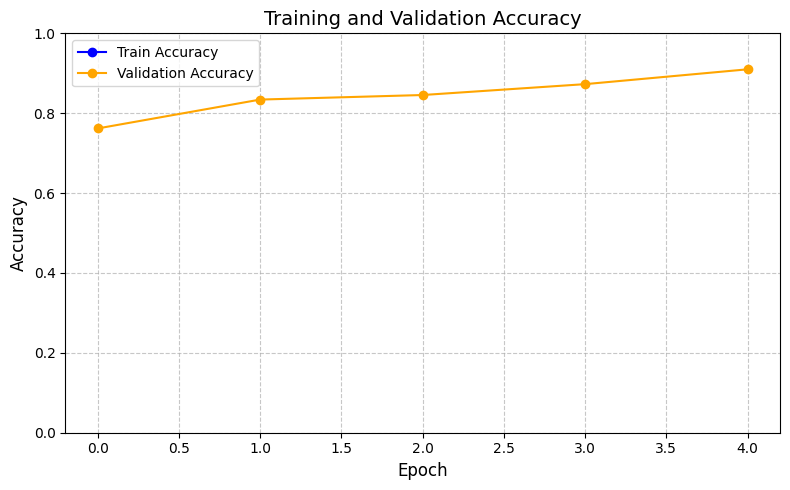

In [ ]:
# Plotting accuracy for training and validation
plt.figure(figsize=(8, 5))  # Ukuran grafik
plt.plot(history['train_acc'], label='Train Accuracy', marker='o', color='blue')
plt.plot(history['val_acc'], label='Validation Accuracy', marker='o', color='orange')

# Menambahkan detail pada grafik
plt.title('Training and Validation Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()  # Menampilkan legenda
plt.ylim([0, 1])  # Skala y diatur antara 0 dan 1
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()

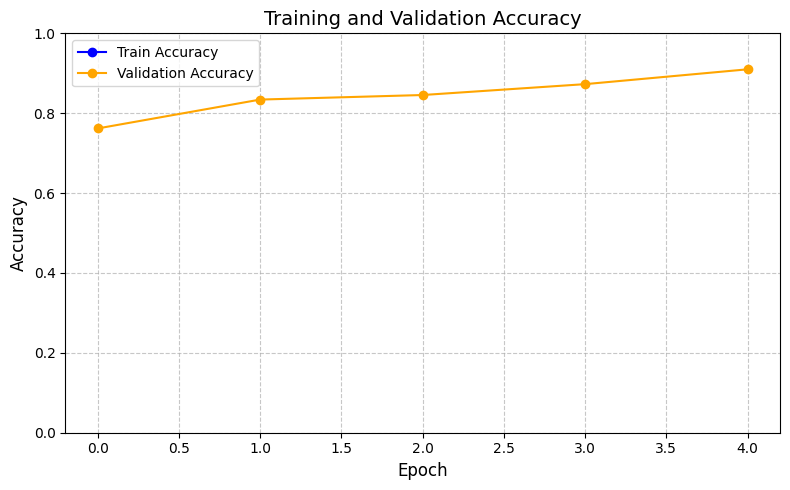

In [ ]:
# Plotting accuracy for training and validation
plt.figure(figsize=(8, 5))  # Ukuran grafik
plt.plot(history['train_acc'], label='Train Accuracy', marker='o', color='blue')
plt.plot(history['val_acc'], label='Validation Accuracy', marker='o', color='orange')

# Menambahkan detail pada grafik
plt.title('Training and Validation Accuracy', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend()  # Menampilkan legenda
plt.ylim([0, 1])  # Skala y diatur antara 0 dan 1
plt.grid(True, linestyle='--', alpha=0.7)

# Menampilkan grafik
plt.tight_layout()
plt.show()

In [ ]:
#simpan hasil prediksi validation set
val_df = pd.read_csv(valid_dataset_path, sep='\t', names = ['Subject', 'Category'])

# Reset list_hyp to store predictions for the validation set
list_hyp = []

# Set model to evaluation mode
model.eval()
torch.set_grad_enabled(False)

# Get predictions for the validation set
for i, batch_data in enumerate(valid_loader):  # Iterate through validation data loader
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    list_hyp += batch_hyp  # Extend list_hyp with predictions from this batch

# Now, list_hyp should contain predictions for the validation set only
val_df['pred'] = list_hyp
val_df.head()
val_df.to_csv('val_pred.csv', index=False)

print(val_df)

                                               Subject  Category      pred
0    besar rasa nyusul ibu sama bapak aku kangen ba...  negative  positive
1    cerita percuma they do not really care about m...  negative  negative
2    allah mati rasa tuh mati aja aku gamau lanjuti...  negative  negative
3    benar ngerasa serah mati tuh dar ngelampiasin ...  negative  negative
4    sopir truk asal pringsewu lampung temu gantung...  negative  negative
..                                                 ...       ...       ...
575   gue kata coba tegas tibatiba katakatanya mace...  negative  negative
576  tw gantung diri bunuh diri hidup nyata harap k...  negative  negative
577  pikir bunuh diri bukan masalah selesai dgn kat...  positive  negative
578  aku ingin mati cuman kadang ken jadi burung aj...  negative  negative
579  sekarang udah tanggal 27 natal kurang bulan ka...  positive  positive

[580 rows x 3 columns]


Testing
(Uji coba Prediksi Test Dataset)

In [ ]:
#Prediksi test set
model.eval()
torch.set_grad_enabled(False)

total_loss, total_correct, total_labels = 0, 0, 0
list_hyp, list_label = [], []
# Initialize pred as an empty list
pred = []

pbar = tqdm(test_loader, leave=True, total=len(test_loader))
for i, batch_data in enumerate(pbar):
    _, batch_hyp, _ = forward_sequence_classification(model, batch_data[:-1], i2w=i2w, device='cuda')
    pred += batch_hyp

100%|██████████| 9/9 [00:02<00:00,  3.53it/s]


In [ ]:
#Simpan prediksi test set
test_df = pd.read_csv(test_dataset_path, sep='\t', names = ['Subject', 'Category'])
test_df['pred'] = pred
test_df.to_csv('test_pred.csv', index=False)

print(test_df)

                                               Subject  Category      pred
0    ringan tugas bu jangan tekan diri terlalu kera...   neutral  negative
1    gue udah capek liat negara koar koar hidup mak...  negative  negative
2    hening panjang jalan pulang lelah minta tetap ...  negative  negative
3    capek hidup banten kalau korupsi leceh pindah ...  negative  negative
4    paruh hidup hilang mikat orang paruh lain hila...  negative  negative
..                                                 ...       ...       ...
281                 kesi yh udah gantung diri pny kaki  negative  negative
282  1 depresi arti kurang ibadahamp syukur padahal...  negative  negative
283  eiser nim jangan laku itu ya kalau gantung dir...  negative  negative
284  sampai bubar sih ingin liat orangorang keluarg...  negative  negative
285  hidup derita tahan hidup arti temu makna pende...  negative  negative

[286 rows x 3 columns]


Classification Report Confusion Matrix

Validation Dataset(Fase Training& Evaluation Model)

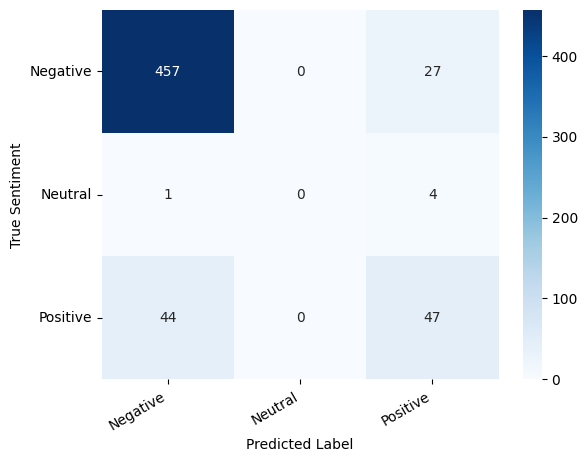

In [ ]:
#confusion matrix
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
    plt.ylabel('True Sentiment')
    plt.xlabel('Predicted Label');

# Extract actual and predicted sentiment labels from val_df
val_real = val_df['Category'].tolist() # Assuming 'Category' column holds the actual sentiment
val_pred = val_df['pred'].tolist()      # Assuming 'pred' column holds the predicted sentiment

cm = confusion_matrix(val_real, val_pred)
df_cm = pd.DataFrame(cm, index=['Negative', 'Neutral', 'Positive'], columns=['Negative', 'Neutral', 'Positive'])
show_confusion_matrix(df_cm)

In [ ]:
print(classification_report(val_real, val_pred, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.94      0.93       484
     Neutral       0.00      0.00      0.00         5
    Positive       0.60      0.52      0.56        91

    accuracy                           0.87       580
   macro avg       0.50      0.49      0.49       580
weighted avg       0.85      0.87      0.86       580



# RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.svm import SVC
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset if not already loaded
dataset = pd.read_csv('/content/hasilabeling.csv')

# Split the dataset into training, validation, and test sets
X = dataset['lemmatized_text']  # Features (text data)
y = dataset['sentiment']       # Target variable (sentiment labels)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # 80% train, 20% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp) # 10% val, 10% test


# Menggunakan TfidfVectorizer untuk mengubah teks menjadi vektor
vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi jumlah fitur (kata) menjadi 5000
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

model = RandomForestClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

# Evaluasi model pada data validation
y_val_pred = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Evaluasi model pada data testing
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(classification_report(y_test, y_test_pred, target_names=['Negative', 'Neutral', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.85      0.99      0.92       241
     Neutral       0.00      0.00      0.00         3
    Positive       0.60      0.13      0.22        45

    accuracy                           0.84       289
   macro avg       0.48      0.37      0.38       289
weighted avg       0.80      0.84      0.80       289



# Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# SVM Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# Evaluasi model pada data validation
y_val_pred_svm = svm_model.predict(X_val_tfidf)
val_accuracy_svm = accuracy_score(y_val, y_val_pred_svm)

# Evaluasi model pada data testing
y_test_pred_svm = svm_model.predict(X_test_tfidf)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print("Support Vector Machine Results:")
print(f"Validation Accuracy: {val_accuracy_svm:.4f}")
print(f"Test Accuracy: {test_accuracy_svm:.4f}")
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_test_pred_svm, target_names=['Negative', 'Neutral', 'Positive']))

Support Vector Machine Results:
Validation Accuracy: 0.8270
Test Accuracy: 0.8408

Classification Report (SVM):
              precision    recall  f1-score   support

    Negative       0.86      0.97      0.91       241
     Neutral       0.00      0.00      0.00         3
    Positive       0.53      0.20      0.29        45

    accuracy                           0.84       289
   macro avg       0.46      0.39      0.40       289
weighted avg       0.80      0.84      0.81       289



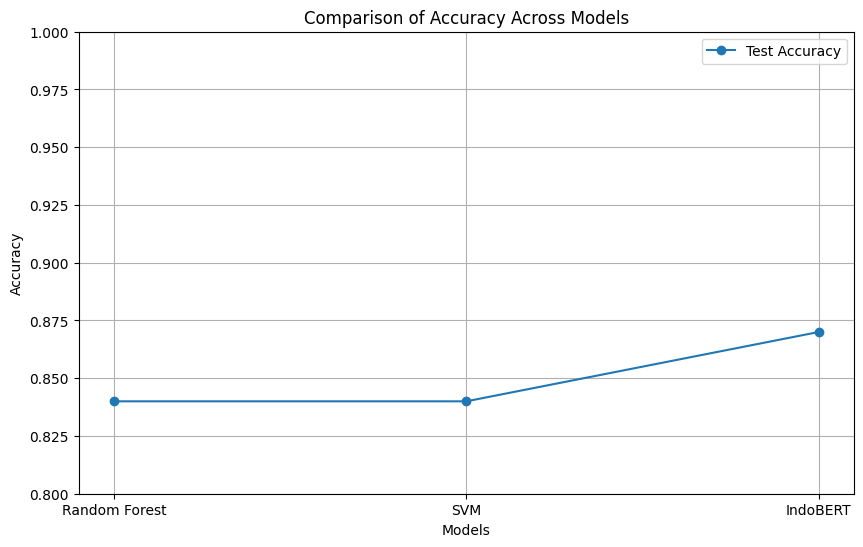

In [ ]:
import matplotlib.pyplot as plt

# Data Akurasi berdasarkan input
models = ['Random Forest', 'SVM', 'IndoBERT']
test_accuracy = [0.84, 0.84, 0.87]       # Test Akurasi

# Plot Grafik
plt.figure(figsize=(10, 6))

plt.plot(models, test_accuracy, marker='o', label='Test Accuracy')

plt.title('Comparison of Accuracy Across Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)  # Batas untuk memperjelas akurasi
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

In [ ]:
import pickle
with open("twitter_sentiment_indobert.pkl", "wb") as f:
    pickle.dump(model, f)